<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # SIMONE ROSSI
<b> Student 2:</b> # TRAN GIA LAC
<b> Group: 36
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
%load_ext autoreload
%autoreload 2
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

Feed-forward

$$o^{(1)}_1 = \frac{1}{1 + e^{-u^{(1)}_1}}\text{, where }u^{(1)}_1 = 1.0 * w^{(1)}_{01} + x_1 * w^{(1)}_{11} + x_2 * w^{(1)}_{21}$$

$$o^{(1)}_2 = \frac{1}{1 + e^{-u^{(1)}_2}}\text{, where }u^{(1)}_2 = 1.0 * w^{(1)}_{02} + x_1 * w^{(1)}_{12} + x_2 * w^{(1)}_{22}$$

$$o^{(2)}_1 = \frac{1}{1 + e^{-u^{(2)}_1}}\text{, where }u^{(2)}_1 = 1.0 * w^{(2)}_{01} + o^{(1)}_1 * w^{(2)}_{11} + o^{(1)}_2 * w^{(2)}_{21}$$

Back-forward

$$L = \left(o^{(2)}_1 - y\right)^2$$

$$\frac{\partial L}{\partial u^{(2)}_1} = \frac{\partial L}{\partial o^{(2)}_1}\frac{\partial o^{(2)}_1}{\partial u^{(2)}_1} = 2\left(o^{(2)}_1 - y\right)o^{(2)}_1\left(1 - o^{(2)}_1\right)$$

$$\frac{\partial L}{\partial w^{(2)}_{01}} = \frac{\partial L}{\partial u^{(2)}_1}\frac{\partial u^{(2)}_1}{\partial w^{(2)}_{01}} = \frac{\partial L}{\partial u^{(2)}_1}$$

$$\frac{\partial L}{\partial w^{(2)}_{11}} = \frac{\partial L}{\partial u^{(2)}_1}\frac{\partial u^{(2)}_1}{\partial w^{(2)}_{11}} = \frac{\partial L}{\partial u^{(2)}_1}o^{(1)}_1$$

$$\frac{\partial L}{\partial w^{(2)}_{21}} = \frac{\partial L}{\partial u^{(2)}_1}\frac{\partial u^{(2)}_1}{\partial w^{(2)}_{21}} = \frac{\partial L}{\partial u^{(2)}_1}o^{(1)}_2$$

$$\frac{\partial L}{\partial u^{(1)}_1} = \frac{\partial L}{\partial u^{(2)}_1}\frac{\partial u^{(2)}_1}{\partial o^{(1)}_1}\frac{\partial o^{(1)}_1}{\partial u^{(1)}_1} = \frac{\partial L}{\partial u^{(2)}_1}w^{(2)}_{11}o^{(1)}_1\left(1 - o^{(1)}_1\right)$$

$$\frac{\partial L}{\partial w^{(1)}_{01}} = \frac{\partial L}{\partial u^{(1)}_1}\frac{\partial u^{(1)}_1}{\partial w^{(1)}_{01}} = \frac{\partial L}{\partial u^{(1)}_1}$$

$$\frac{\partial L}{\partial w^{(1)}_{11}} = \frac{\partial L}{\partial u^{(1)}_{1}}\frac{\partial u^{(1)}_1}{\partial w^{(1)}_{11}} = \frac{\partial L}{\partial u^{(1)}_{1}}x_1$$

$$\frac{\partial L}{\partial w^{(1)}_{21}} = \frac{\partial L}{\partial u^{(1)}_{1}}\frac{\partial u^{(1)}_1}{\partial w^{(1)}_{21}} = \frac{\partial L}{\partial u^{(1)}_{1}}x_2$$

$$\frac{\partial L}{\partial u^{(1)}_{2}} = \frac{\partial L}{\partial u^{(2)}_1}\frac{\partial u^{(2)}_1}{\partial o^{(1)}_2}\frac{\partial o^{(1)}_2}{\partial u^{(1)}_{2}} = \frac{\partial L}{\partial u^{(2)}_1}w^{(2)}_{21}o^{(1)}_2\left(1 - o^{(1)}_2\right)$$

$$\frac{\partial L}{\partial w^{(1)}_{02}} = \frac{\partial L}{\partial u^{(1)}_2}\frac{\partial u^{(1)}_2}{\partial w^{(1)}_{02}} = \frac{\partial L}{\partial u^{(1)}_2}$$

$$\frac{\partial L}{\partial w^{(1)}_{12}} = \frac{\partial L}{\partial u^{(1)}_2}\frac{\partial u^{(1)}_2}{\partial w^{(1)}_{12}} = \frac{\partial L}{\partial u^{(1)}_2}x_1$$

$$\frac{\partial L}{\partial w^{(1)}_{22}} = \frac{\partial L}{\partial u^{(1)}_2}\frac{\partial u^{(1)}_2}{\partial w^{(1)}_{22}} = \frac{\partial L}{\partial u^{(1)}_2}x_2$$

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

u1_1 = 1.0 * w1_01 + x1 * w1_11 + x2 * w1_21 # activation of the green neuron
o1_1 = sigmoid(u1_1) # Output of the green neuron

u1_2 = 1.0 * w1_02 + x1 * w1_12 + x2 * w1_22 # activation of the red neuron
o1_2 = sigmoid(u1_2) # Output of the red neuron

u2_1 = 1.0 * w2_01 + o1_1 * w2_11 + o1_2 * w2_21 # activation of the black neuron
o2_1 = sigmoid(u2_1) # Output of the black neuron

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_u2_1 = 2 * (o2_1 - y) * o2_1 * (1 - o2_1)
dL_w2_01 = dL_u2_1
dL_w2_11 = dL_u2_1 * o1_1
dL_w2_21 = dL_u2_1 * o1_2

# Partial derivatives of the loss wrt weights of the first layer
dL_u1_1 = dL_u2_1 * w2_11 * o1_1 * (1 - o1_1)
dL_w1_01 = dL_u1_1
dL_w1_11 = dL_u1_1 * x1
dL_w1_21 = dL_u1_1 * x2

dL_u1_2 = dL_u2_1 * w2_21 * o1_2 * (1 - o1_2)
dL_w1_02 = dL_u1_2
dL_w1_12 = dL_u1_2 * x1
dL_w1_22 = dL_u1_2 * x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

u1_1 = 1.0 * w1_01 + x1 * w1_11 + x2 * w1_21 # new activation of the green neuron
o1_1 = sigmoid(u1_1) # new output of the green neuron

u1_2 = 1.0 * w1_02 + x1 * w1_12 + x2 * w1_22 # new activation of the red neuron
o1_2 = sigmoid(u1_2) # new output of the red neuron

u2_1 = 1.0 * w2_01 + o1_1 * w2_11 + o1_2 * w2_21 # new activation of the black neuron
o2_1 = sigmoid(u2_1) # new output of the black neuron


print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095778
=== BACKWARD PASS ===
w1_01 = 0.25403317902693395
w1_11 = 0.34322654322154716
w1_21 = 0.8108066358053868
w1_02 = -0.4341841377344243
w1_12 = -0.5273473101875394
w1_22 = 0.19316317245311515
w2_01 = 0.10637455535192764
w2_11 = -0.8541467506279606
w2_21 = 0.27457272177725717
=== FORWARD PASS 2 ===
o = 0.40648823589210104


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [2]:
# SOLUTION
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        u_1 = np.matmul(self.input, self.W_input_to_hidden)
        self.u_hidden = u_1
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
        # Compute output of hidden layer
        self.o_hidden[:, :-1] = self.transfer_f(x = self.u_hidden)
        # Compute activations for the output layer
        u_2 = np.matmul(self.o_hidden, self.W_hidden_to_output)
        self.u_output = u_2
        # Compute output of output layer
        self.o_output = self.transfer_f(x = self.u_output)

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [6]:
# First define your neural network
model = NeuralNetwork(input_layer_size = 2, hidden_layer_size = 2, output_layer_size = 1, transfer_f = sigmoid, transfer_df = dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Print the output
print("Output =", model.o_output[0,0])

Output = 0.5597295991095776


<b>Question 1.2.3</b>: Implement the backpropagate() function.

Consider a dataset $\mathcal{D} = \left\lbrace\left(x_i, y_i\right)\right\rbrace_{i=1}^N$, where $x_i \in \mathbb{R}^{D}$ and $y_i \in \mathbb{R}^{C}$. We would like to train a 1-hidden-layer neural network with $H$ hidden units on dataset $\mathcal{D}$.

Conventional notation:
+ Design matrix: $X \in \mathbb{R}^{N \times (D + 1)}$ with the last column of 1, i.e $X_{.,D} = \mathbf{1}$
+ Target matrix: $Y \in \mathbb{R}^{N \times C}$
+ The weight matrix from the input layer to hidden unit: $W^{(1)} \in \mathbb{R}^{(D + 1) \times H}$
+ The j-th hidden activation of sample $X_n$: $U^{(1)}_j\left(X_n\right) = U^{(1)}_{n,j} = \sum_{i=0}^DX_{n,i}W^{(1)}_{ij}$, where $j = 0,\dots,H-1$
+ The j-th hidden output of sample $X_n$: $O^{(1)}_j\left(X_n\right) = O^{(1)}_{n,j} = sigmoid\left(U^{(1)}_j\left(X_n\right)\right)$, where $j = 0,\dots,H-1$ and $O^{(1)}_H\left(X_n\right) = O^{(1)}_{n,H} = \mathbf{1}$
+ The weight matrix from the hidden layer to the output layer: $W^{(2)} \in \mathbb{R}^{(H + 1)\times C}$
+ The j-th output activation of sample $X_n$: $U^{(2)}_j\left(X_n\right) = U^{(2)}_{n,j} = \sum_{i=0}^H O^{(1)}_{n,i}W^{(2)}_{ij}$, where $j=0,\dots,C-1$
+ The j-th output of sample $X_n$: $O^{(2)}_j\left(X_n\right) = O^{(2)}_{n,j} = sigmoid\left(U^{(2)}_j\left(X_n\right)\right)$, where $j=0,\dots,C-1$
+ Loss function: $L = \sum_{n=0}^{N-1}\sum_{c=0}^{C-1}\left(O^{(2)}_{c}\left(X_n\right) - Y_{n, c}\right)^2$

Back-propagation
$$\frac{\partial L}{\partial U^{(2)}_j\left(X_n\right)} = \frac{\partial L}{\partial O^{(2)}_j\left(X_n\right)}\frac{\partial O^{(2)}_j\left(X_n\right)}{\partial U^{(2)}_j\left(X_n\right)} = 2\left[O^{(2)}_{j}\left(X_n\right) - Y_{n, j}\right]O^{(2)}_{j}\left(X_n\right)\left[1 - O^{(2)}_{j}\left(X_n\right)\right]$$

$$\text{Matrix form: }\frac{\partial L}{\partial U^{(2)}} = 2\odot\left[O^{(2)} - Y\right]\odot O^{(2)}\odot\left[\mathbf{1} - O^{(2)}\right]$$

$$\frac{\partial L}{\partial U^{(1)}_j\left(X_n\right)} = \frac{\partial L}{\partial O^{(1)}_j\left(X_n\right)}\frac{\partial O^{(1)}_j\left(X_n\right)}{\partial U^{(1)}_j\left(X_n\right)} = \frac{\partial L}{\partial O^{(1)}_j\left(X_n\right)}O^{(1)}_j\left(X_n\right)\left[1 - O^{(1)}_j\left(X_n\right)\right]$$

$$\frac{\partial L}{\partial O^{(1)}_j\left(X_n\right)} = \sum_{c=0}^{C-1}\frac{\partial L}{\partial U^{(2)}_c\left(X_n\right)}\frac{\partial U^{(2)}_c\left(X_n\right)}{\partial O^{(1)}_j\left(X_n\right)} = \sum_{c=0}^{C-1}\frac{\partial L}{\partial U^{(2)}_{n,c}}W^{(2)}_{j,c}$$

$$\text{Matrix form}: \frac{\partial L}{\partial U^{(1)}} = \frac{\partial L}{\partial O^{(1)}}\odot O^{(1)}\odot\left[\mathbf(1) - O^{(1)}\right] = \frac{\partial L}{\partial U^{(2)}}\left[W^{(2)}\right]^T\odot O^{(1)}\odot\left[\mathbf{1} - O^{(1)}\right]$$

$$\frac{\partial L}{\partial W^{(2)}_{ij}} = \sum_{n=0}^{N-1}\frac{\partial L}{\partial U^{(2)}_j\left(X_n\right)}\frac{\partial U^{(2)}_j\left(X_n\right)}{\partial W^{(2)}_{ij}} = \sum_{n=0}^{N-1}\frac{\partial L}{\partial U^{(2)}_{n,j}}O^{(1)}_{n,i}$$

$$\text{Matrix form: }\frac{\partial L}{\partial W^{(2)}} = \left[O^{(1)}\right]^T\frac{\partial L}{\partial U^{(2)}}$$

$$\frac{\partial L}{\partial W^{(1)}_{ij}} = \sum_{n=0}^{N-1}\frac{\partial L}{\partial U^{(1)}_j\left(X_n\right)}\frac{\partial U^{(1)}_j\left(X_n\right)}{\partial W^{(1)}_{ij}} = \sum_{n=0}^{N-1}\frac{\partial L}{\partial U^{(1)}_{n,j}}X_{n,i}$$

$$\text{Matrix form: }\frac{\partial L}{\partial W^{(1)}} = X^T\frac{\partial L}{\partial U^{(1)}}$$

In [4]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
        targets = np.array(targets) # Target outputs
        # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_output = 2 * np.multiply(self.o_output - targets, self.transfer_df(self.u_output))
        # Compute partial derivative of loss with respect to activations of hidden layer
        dL_do_hidden = np.matmul(self.dL_du_output, np.transpose(self.W_hidden_to_output[:-1]))
        self.dL_du_hidden = np.multiply(dL_do_hidden, self.transfer_df(self.u_hidden))
        # Compute partial derivative of loss with respect to weights
        dW_hidden_to_output = np.matmul(np.transpose(self.o_hidden), self.dL_du_output)
        dW_input_to_hidden = np.matmul(np.transpose(self.input), self.dL_du_hidden)
        # Make updates
        self.W_hidden_to_output -= l*dW_hidden_to_output/len(targets)
        self.W_input_to_hidden -= l*dW_input_to_hidden/len(targets)

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [8]:
# First define your neural network
model = NeuralNetwork(input_layer_size = 2, hidden_layer_size = 2, output_layer_size = 1, transfer_f = sigmoid, transfer_df = dsigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6], [0.4], [0.5]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.34322654 -0.52734731]
 [ 0.81080664  0.19316317]
 [ 0.25403318 -0.43418414]]
W_hidden_to_output = [[-0.85414675]
 [ 0.27457272]
 [ 0.10637456]]
Output = [[0.40648824]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [6]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


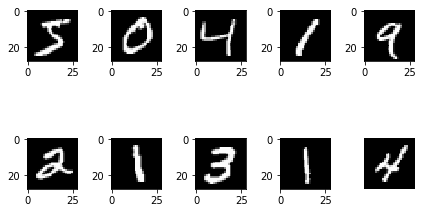

In [7]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [11]:
# Define your neural network
mnist_model = NeuralNetwork(input_layer_size=784, hidden_layer_size=30, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

In [45]:
def grid_search(hidden_layer_size_list, learning_rate_list, train_data, validation_data, test_data):
    all_hidden_layer_size = []
    all_learning_rate = []
    all_acc_rate = []
    for hidden_layer_size in hidden_layer_size_list:
        model = NeuralNetwork(input_layer_size=784, hidden_layer_size=hidden_layer_size, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)
        for learning_rate in learning_rate_list:
            model.weights_init()
            model.train(data=train_data, validation_data=validation_data, iterations=300, learning_rate=learning_rate, verbose=False)
            num_acc = model.predict(test_data=test_data)
            acc_rate = 100 * num_acc / len(test_data[0])
            all_hidden_layer_size.append(hidden_layer_size)
            all_learning_rate.append(learning_rate)
            all_acc_rate.append(acc_rate)
            print("Hidden layer size: %d, learning rate: %2.2f, accuracy rate: %2.2f %%" %(hidden_layer_size, learning_rate, acc_rate))
    # summary all results
    print("\nSummary:")
    for hidden_layer_size, learning_rate, acc_rate in zip(all_hidden_layer_size, all_learning_rate, all_acc_rate):
        print("Hidden layer size: %d, learning rate: %2.2f, accuracy rate: %2.2f %%" %(hidden_layer_size, learning_rate, acc_rate))

Training time: 20.833425045013428


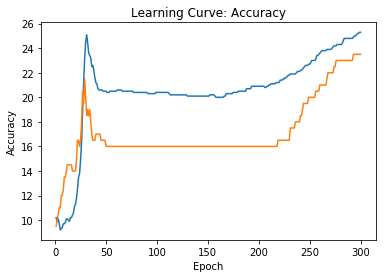

Hidden layer size: 30, learning rate: 0.10, accuracy rate: 24.66 %
Training time: 20.85736846923828


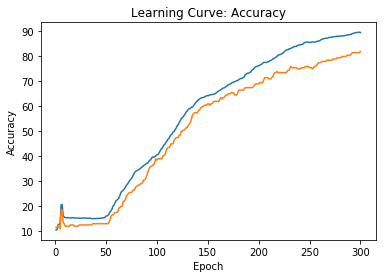

Hidden layer size: 30, learning rate: 1.00, accuracy rate: 83.33 %
Training time: 20.6022732257843


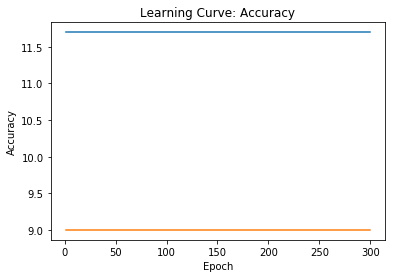

Hidden layer size: 30, learning rate: 10.00, accuracy rate: 10.28 %

Summary:
Hidden layer size: 30, learning rate: 0.10, accuracy rate: 24.66 %
Hidden layer size: 30, learning rate: 1.00, accuracy rate: 83.33 %
Hidden layer size: 30, learning rate: 10.00, accuracy rate: 10.28 %


In [46]:
hidden_layer_size_list = [30]
learning_rate_list = [0.1, 1.0, 10.0]
grid_search(hidden_layer_size_list=hidden_layer_size_list, learning_rate_list=learning_rate_list, \
            train_data=small_training_data, validation_data=small_validation_data, test_data=test_data)

<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Training time: 19.81875777244568


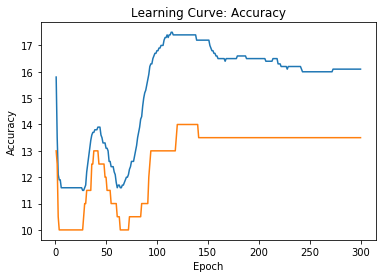

Hidden layer size: 15, learning rate: 0.10, accuracy rate: 15.03 %
Training time: 19.815295219421387


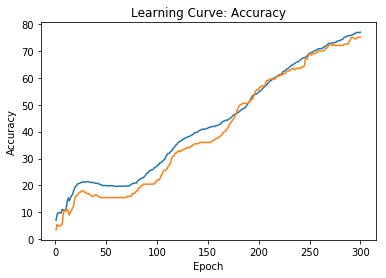

Hidden layer size: 15, learning rate: 1.00, accuracy rate: 71.45 %
Training time: 20.012224435806274


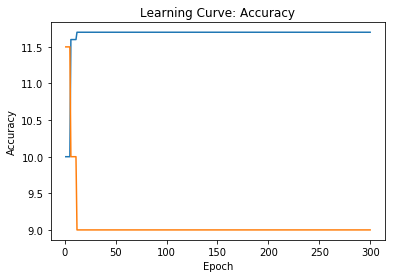

Hidden layer size: 15, learning rate: 10.00, accuracy rate: 10.28 %
Training time: 23.102577686309814


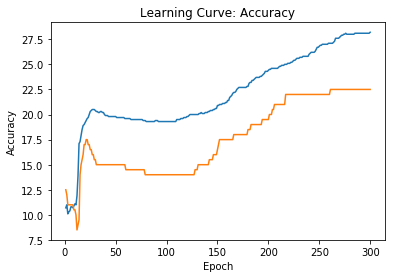

Hidden layer size: 75, learning rate: 0.10, accuracy rate: 26.51 %
Training time: 23.184396266937256


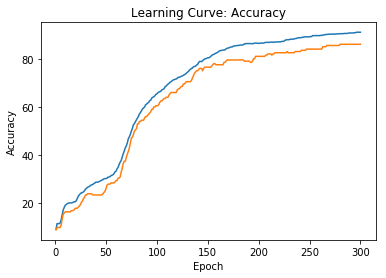

Hidden layer size: 75, learning rate: 1.00, accuracy rate: 85.31 %
Training time: 23.229973077774048


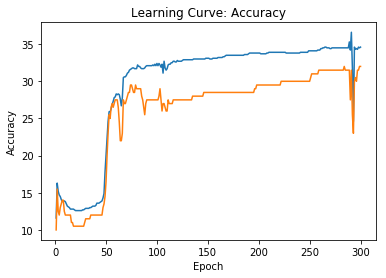

Hidden layer size: 75, learning rate: 10.00, accuracy rate: 32.03 %

Summary:
Hidden layer size: 15, learning rate: 0.10, accuracy rate: 15.03 %
Hidden layer size: 15, learning rate: 1.00, accuracy rate: 71.45 %
Hidden layer size: 15, learning rate: 10.00, accuracy rate: 10.28 %
Hidden layer size: 75, learning rate: 0.10, accuracy rate: 26.51 %
Hidden layer size: 75, learning rate: 1.00, accuracy rate: 85.31 %
Hidden layer size: 75, learning rate: 10.00, accuracy rate: 32.03 %


In [47]:
# Define your neural network
# 15 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.

# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.
hidden_layer_size_list = [15, 75]
learning_rate_list = [0.1, 1.0, 10.0]
grid_search(hidden_layer_size_list=hidden_layer_size_list, learning_rate_list=learning_rate_list, \
            train_data=small_training_data, validation_data=small_validation_data, test_data=test_data)

<b>Question 2.1.4</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Training time: 1.5897607803344727


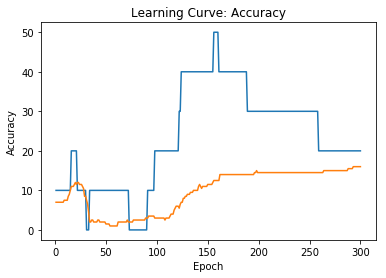

Hidden layer size: 15, learning rate: 0.10, accuracy rate: 13.38 %
Training time: 1.5592970848083496


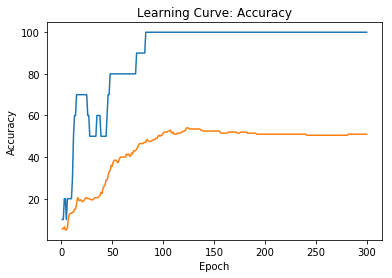

Hidden layer size: 15, learning rate: 1.00, accuracy rate: 48.28 %
Training time: 1.538010597229004


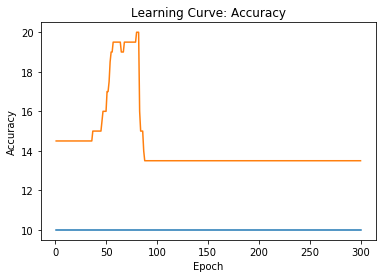

Hidden layer size: 15, learning rate: 10.00, accuracy rate: 15.38 %
Training time: 1.65128755569458


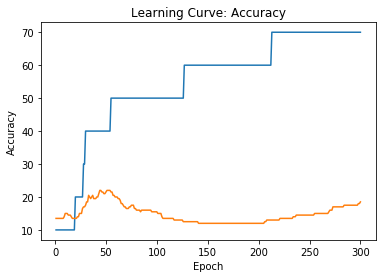

Hidden layer size: 30, learning rate: 0.10, accuracy rate: 19.36 %
Training time: 1.6123006343841553


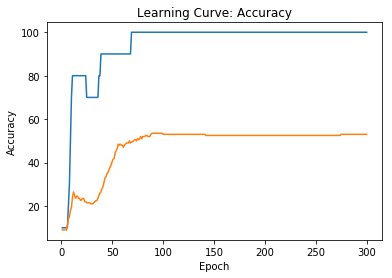

Hidden layer size: 30, learning rate: 1.00, accuracy rate: 51.09 %
Training time: 1.613112211227417


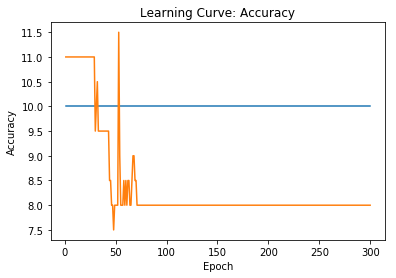

Hidden layer size: 30, learning rate: 10.00, accuracy rate: 7.98 %
Training time: 1.8966856002807617


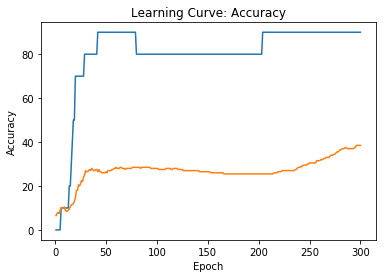

Hidden layer size: 75, learning rate: 0.10, accuracy rate: 37.09 %
Training time: 1.8877007961273193


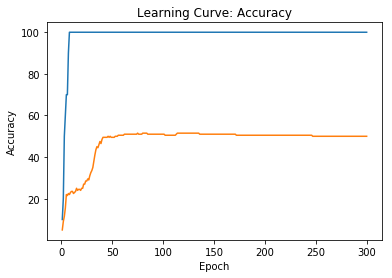

Hidden layer size: 75, learning rate: 1.00, accuracy rate: 50.95 %
Training time: 1.9173026084899902


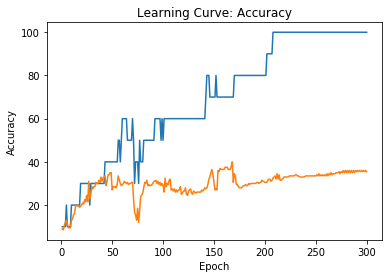

Hidden layer size: 75, learning rate: 10.00, accuracy rate: 35.40 %

Summary:
Hidden layer size: 15, learning rate: 0.10, accuracy rate: 13.38 %
Hidden layer size: 15, learning rate: 1.00, accuracy rate: 48.28 %
Hidden layer size: 15, learning rate: 10.00, accuracy rate: 15.38 %
Hidden layer size: 30, learning rate: 0.10, accuracy rate: 19.36 %
Hidden layer size: 30, learning rate: 1.00, accuracy rate: 51.09 %
Hidden layer size: 30, learning rate: 10.00, accuracy rate: 7.98 %
Hidden layer size: 75, learning rate: 0.10, accuracy rate: 37.09 %
Hidden layer size: 75, learning rate: 1.00, accuracy rate: 50.95 %
Hidden layer size: 75, learning rate: 10.00, accuracy rate: 35.40 %


In [48]:
# Train NN and print accuracy on test data
# 30 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.

# 15 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.

# 75 hidden neurons
# Learning rate 0.1
# Learning rate 1.
# Learning rate 10.

hidden_layer_size_list = [15, 30, 75]
learning_rate_list = [0.1, 1.0, 10.0]
grid_search(hidden_layer_size_list=hidden_layer_size_list, learning_rate_list=learning_rate_list, \
            train_data=vsmall_training_data, validation_data=small_validation_data, test_data=test_data)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer:

In 2.1.2, the results are:
+ Hidden layer size: 30, learning rate: 0.10, accuracy rate: 24.66 %
+ Hidden layer size: 30, learning rate: 1.00, accuracy rate: 83.33 %
+ Hidden layer size: 30, learning rate: 10.00, accuracy rate: 10.28 %

The learning rate 1.00 is an approprite one
The learning rate 0.1 is too small, and it makes the convergence slow
The learning rate 10.0 is too large, which lead to the divergence in optimization

In 2.1.3, the results are:
+ Hidden layer size: 15, learning rate: 0.10, accuracy rate: 15.03 %
+ Hidden layer size: 15, learning rate: 1.00, accuracy rate: 71.45 %
+ Hidden layer size: 15, learning rate: 10.00, accuracy rate: 10.28 %
+ Hidden layer size: 75, learning rate: 0.10, accuracy rate: 26.51 %
+ Hidden layer size: 75, learning rate: 1.00, accuracy rate: 85.31 %
+ Hidden layer size: 75, learning rate: 10.00, accuracy rate: 32.03 %

Likewise in 2.1.2 result, the learning rate 1.00 is still the best
The number of hidden unit of 30 is possibly inadequate for data representation. Therefore, the accuracy rate are improved from 83.33% to 85.31% when the number of hidden units increase from 30 to 75 with the learning rate of 1.00

In 2.1.4, the results are:
+ Hidden layer size: 15, learning rate: 0.10, accuracy rate: 13.38 %
+ Hidden layer size: 15, learning rate: 1.00, accuracy rate: 48.28 %
+ Hidden layer size: 15, learning rate: 10.00, accuracy rate: 15.38 %
+ Hidden layer size: 30, learning rate: 0.10, accuracy rate: 19.36 %
+ Hidden layer size: 30, learning rate: 1.00, accuracy rate: 51.09 %
+ Hidden layer size: 30, learning rate: 10.00, accuracy rate: 7.98 %
+ Hidden layer size: 75, learning rate: 0.10, accuracy rate: 37.09 %
+ Hidden layer size: 75, learning rate: 1.00, accuracy rate: 50.95 %
+ Hidden layer size: 75, learning rate: 10.00, accuracy rate: 35.40 %

When we use very small number of training data, the best number of hidden unit is 30 instead of 75 as previous experiments. It is because the model is easy to prone to overfitting with the scarce of data, and a model with small capacity can mitigate the overfitting problem 

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer: Among all configurations for the hidden neurons and learning rate, I guess the best learning rate is 1.00. Because we use whole dataset mnist, the overfitting problem will not occur seriously. Therefore, I guess the best hidden unit is 75 

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 1677.698627948761


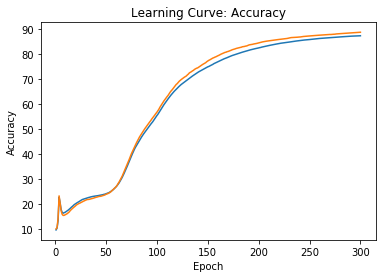

Using whole training data, accuracy rate with 75 hidden unit and learning rate of 1.0 is: 88.37


In [50]:
mnist_model = NeuralNetwork(input_layer_size=784, hidden_layer_size=75, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)
mnist_model.train(data=training_data, validation_data=validation_data, iterations=300, learning_rate=1.0, verbose=False)
num_acc = mnist_model.predict(test_data=test_data)
acc_rate = 100 * num_acc / len(test_data[0])
print("Using whole training data, accuracy rate with 75 hidden unit and learning rate of 1.0 is:", acc_rate)

Training time: 6977.159265756607


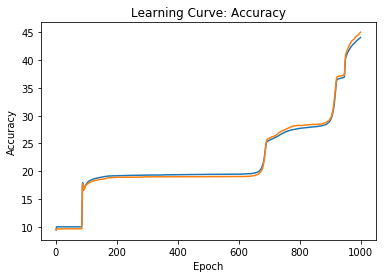

Using whole training data, accuracy rate with 200 hidden unit and learning rate of 1.0 is: 44.38


In [8]:
mnist_model = NeuralNetwork(input_layer_size=784, hidden_layer_size=200, output_layer_size=10, transfer_f=sigmoid, transfer_df=dsigmoid)
mnist_model.train(data=training_data, validation_data=validation_data, iterations=1000, learning_rate=1.0, verbose=False)
num_acc = mnist_model.predict(test_data=test_data)
acc_rate = 100 * num_acc / len(test_data[0])
print("Using whole training data, accuracy rate with 200 hidden unit and learning rate of 1.0 is:", acc_rate)

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = $

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [ ]:
class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        pass

    def backpropagate_xe(self, targets, learning_rate=5.0):
        pass

<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

In [ ]:
# Define your neural network
mnist_model_xe = 

# Train NN and print accuracy on validation data

In [ ]:
# Print accuracy on test data

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: 

<div align="center"><b>THE END!</b>